In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
ltsm = pd.read_excel('Unemployment_Final_edit.xlsx')

In [5]:
ltsm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Years                      23 non-null     int64  
 1   CA_Civilian_labor_force_0  23 non-null     float64
 2   CA_Civilian_labor_force_1  23 non-null     float64
 3   CA_Employed_0              23 non-null     float64
 4   CA_Employed_1              23 non-null     float64
 5   CA_Unemployed__0           23 non-null     float64
 6   CA_Unemployed_1            23 non-null     float64
 7   CA_Unemployment_rate_0     23 non-null     float64
 8   CA_Unemployment_rate_1     23 non-null     float64
 9   FL_Civilian_labor_force_0  23 non-null     float64
 10  FL_Civilian_labor_force_1  23 non-null     float64
 11  FL_Employed_0              23 non-null     float64
 12  FL_Employed_1              23 non-null     float64
 13  FL_Unemployed__0           23 non-null     float64
 

## **LSTM Model**



**CA Metro**

In [6]:
features = ['TX_Civilian_labor_force_1', 'TX_Employed_1', 'TX_Unemployed_1']
target = 'TX_Unemployment_rate_1'

# Prepare the data
X = ltsm[features].values
y = ltsm[target].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

# Split the data into training and testing sets
split = int(0.8 * len(ltsm))
X_train, X_test = X_scaled[:split], X_scaled[split:]
y_train, y_test = y_scaled[:split], y_scaled[split:]

# Reshape the data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, len(features))))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=5)



Epoch 1/100
4/4 [==============================] - 8s 10ms/step - loss: 0.2412
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2248
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2072
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1919
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1745
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1556
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1376
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1223
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1023
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0847
Epoch 11/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0718
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0578
Epoch 13/100
4/4 [==============================] - 0s 8m

1/1 [==============================] - 0s 59ms/step


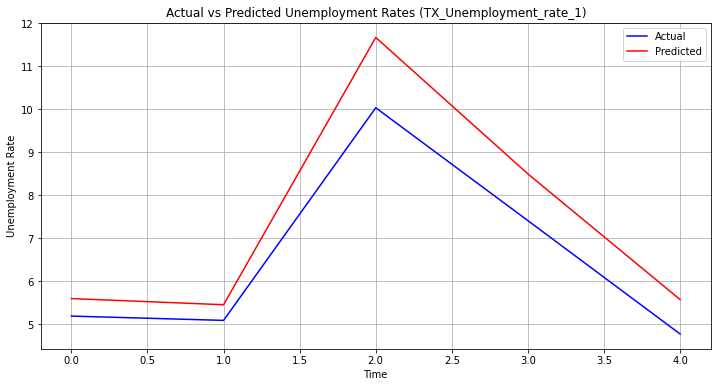

In [8]:
# Make predictions
predictions = model.predict(X_test)

# Inverse scaling for predictions
predictions = scaler.inverse_transform(predictions).flatten()
y_test_actual = scaler.inverse_transform(y_test).flatten()

# Plotting actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Unemployment Rates (TX_Unemployment_rate_1)')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)
plt.show()

In [10]:


# Make predictions
predictions_scaled = model.predict(X_test)

# Inverse scaling for predictions
predictions = scaler.inverse_transform(predictions_scaled).flatten()
y_test_actual = scaler.inverse_transform(y_test).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test_actual, predictions)
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mse)
percentage_accuracy = ((1 - (np.abs(y_test_actual - predictions) / y_test_actual)) * 100)

# Mean percentage accuracy
mean_percentage_accuracy = percentage_accuracy.mean()
print("Mean Percentage Accuracy on test set:", mean_percentage_accuracy, "%")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


1/1 [==============================] - 0s 25ms/step
Mean Percentage Accuracy on test set: 87.432186588284 %
Mean Squared Error (MSE): 0.9605699988933087
Mean Absolute Error (MAE): 0.8595328124793807
Root Mean Squared Error (RMSE): 0.9800867302914109


**Texas Non Metro**

In [11]:
features = ['TX_Civilian_labor_force_0', 'TX_Employed_0', 'TX_Unemployed__0']
target = 'TX_Unemployment_rate_0'

# Prepare the data
X = ltsm[features].values
y = ltsm[target].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

# Split the data into training and testing sets
split = int(0.8 * len(ltsm))
X_train, X_test = X_scaled[:split], X_scaled[split:]
y_train, y_test = y_scaled[:split], y_scaled[split:]

# Reshape the data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, len(features))))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=5)



Epoch 1/100
4/4 [==============================] - 3s 8ms/step - loss: 0.2864
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2655
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2437
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2255
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2040
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1802
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1546
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1279
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1059
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0849
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0684
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0510
Epoch 13/100
4/4 [==============================] - 0s 5ms/st

1/1 [==============================] - 0s 29ms/step


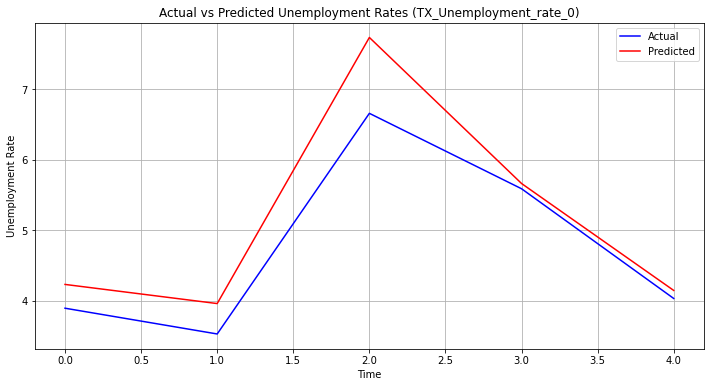

In [13]:
# Make predictions
predictions = model.predict(X_test)

# Inverse scaling for predictions
predictions = scaler.inverse_transform(predictions).flatten()
y_test_actual = scaler.inverse_transform(y_test).flatten()

# Plotting actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Unemployment Rates (TX_Unemployment_rate_0)')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)
plt.show()

In [14]:


# Make predictions
predictions_scaled = model.predict(X_test)

# Inverse scaling for predictions
predictions = scaler.inverse_transform(predictions_scaled).flatten()
y_test_actual = scaler.inverse_transform(y_test).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test_actual, predictions)
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mse)
percentage_accuracy = ((1 - (np.abs(y_test_actual - predictions) / y_test_actual)) * 100)

# Mean percentage accuracy
mean_percentage_accuracy = percentage_accuracy.mean()
print("Mean Percentage Accuracy on test set:", mean_percentage_accuracy, "%")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


1/1 [==============================] - 0s 19ms/step
Mean Percentage Accuracy on test set: 91.74739518022729 %
Mean Squared Error (MSE): 0.2960158555471546
Mean Absolute Error (MAE): 0.4071173718623342
Root Mean Squared Error (RMSE): 0.5440733916919248


**MI Metro**

In [15]:
features1 = ['MI_Civilian_labor_force_1', 'MI_Employed_1', 'MI_Unemployed_1']
target = 'MI_Unemployment_rate_1'

# Prepare the data
X = ltsm[features].values
y = ltsm[target].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

# Split the data into training and testing sets
split = int(0.8 * len(ltsm))
X_train, X_test = X_scaled[:split], X_scaled[split:]
y_train, y_test = y_scaled[:split], y_scaled[split:]

# Reshape the data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, len(features1))))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=5)



Epoch 1/100
4/4 [==============================] - 3s 6ms/step - loss: 0.2197
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2035
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1833
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1671
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1492
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1307
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1146
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0970
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0816
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0678
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0576
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0516
Epoch 13/100
4/4 [==============================] - 0s 5ms/st

1/1 [==============================] - 1s 679ms/step


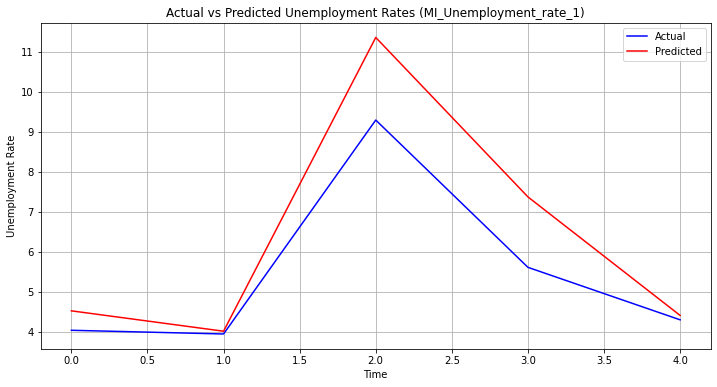

In [16]:
# Make predictions
predictions = model.predict(X_test)

# Inverse scaling for predictions
predictions = scaler.inverse_transform(predictions).flatten()
y_test_actual = scaler.inverse_transform(y_test).flatten()

# Plotting actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Unemployment Rates (MI_Unemployment_rate_1)')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)
plt.show()

In [17]:


# Make predictions
predictions_scaled = model.predict(X_test)

# Inverse scaling for predictions
predictions = scaler.inverse_transform(predictions_scaled).flatten()
y_test_actual = scaler.inverse_transform(y_test).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test_actual, predictions)
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mse)
percentage_accuracy = ((1 - (np.abs(y_test_actual - predictions) / y_test_actual)) * 100)

# Mean percentage accuracy
mean_percentage_accuracy = percentage_accuracy.mean()
print("Mean Percentage Accuracy on test set:", mean_percentage_accuracy, "%")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


1/1 [==============================] - 0s 28ms/step
Mean Percentage Accuracy on test set: 86.01838292430185 %
Mean Squared Error (MSE): 1.5223813198456735
Mean Absolute Error (MAE): 0.8977558620159443
Root Mean Squared Error (RMSE): 1.2338481753626227


**MI Non-Metro**

In [18]:
features1 = ['MI_Civilian_labor_force_0', 'MI_Employed_0', 'MI_Unemployed__0']
target = 'MI_Unemployment_rate_0'

# Prepare the data
X = ltsm[features].values
y = ltsm[target].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

# Split the data into training and testing sets
split = int(0.8 * len(ltsm))
X_train, X_test = X_scaled[:split], X_scaled[split:]
y_train, y_test = y_scaled[:split], y_scaled[split:]

# Reshape the data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, len(features1))))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=5)



Epoch 1/100
4/4 [==============================] - 4s 5ms/step - loss: 0.2272
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2116
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1966
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1778
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1641
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1470
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1311
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1123
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0977
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0813
Epoch 11/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0701
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0564
Epoch 13/100
4/4 [==============================] - 0s 5ms/st

1/1 [==============================] - 1s 789ms/step


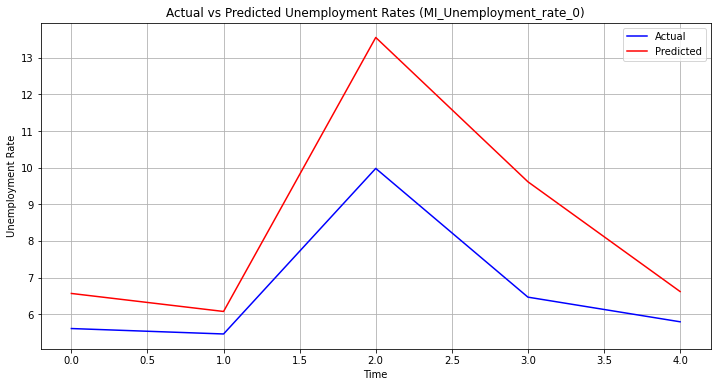

In [19]:
# Make predictions
predictions = model.predict(X_test)

# Inverse scaling for predictions
predictions = scaler.inverse_transform(predictions).flatten()
y_test_actual = scaler.inverse_transform(y_test).flatten()

# Plotting actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Unemployment Rates (MI_Unemployment_rate_0)')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)
plt.show()

In [20]:


# Make predictions
predictions_scaled = model.predict(X_test)

# Inverse scaling for predictions
predictions = scaler.inverse_transform(predictions_scaled).flatten()
y_test_actual = scaler.inverse_transform(y_test).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test_actual, predictions)
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mse)
percentage_accuracy = ((1 - (np.abs(y_test_actual - predictions) / y_test_actual)) * 100)

# Mean percentage accuracy
mean_percentage_accuracy = percentage_accuracy.mean()
print("Mean Percentage Accuracy on test set:", mean_percentage_accuracy, "%")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


1/1 [==============================] - 0s 27ms/step
Mean Percentage Accuracy on test set: 74.58079915721491 %
Mean Squared Error (MSE): 4.933645580134368
Mean Absolute Error (MAE): 1.8241593630560513
Root Mean Squared Error (RMSE): 2.221181122766527


**Accuracy Of Model**

In [43]:


# Calculate percentage error for each prediction
percentage_errors = np.abs((predictions - y_test_actual) / y_test_actual) * 100

# Calculate mean percentage error
mean_percentage_error = np.mean(percentage_errors)
# Calculate accuracy
accuracy = 100 - mean_percentage_error
print("Accuracy:", accuracy)

print("Mean Percentage Error:", mean_percentage_error)


Accuracy: 87.77427606397457
Mean Percentage Error: 12.225723936025437


In [21]:
# Prepare the features for the next time period
X_next_period = ltsm[features].iloc[-1].values.reshape(1, -1)  # Assuming the last row represents the latest time period

# Reshape the features for scaling
X_next_period_reshaped = X_next_period.reshape(-1, 1)

# Scale the features for the next time period
X_next_period_scaled = scaler.transform(X_next_period_reshaped)

# Reshape the scaled features for LSTM input
X_next_period_scaled_reshaped = X_next_period_scaled.reshape(1, 1, len(features))

# Use the trained LSTM model to predict the unemployment rate for the next time period
predicted_unemployment_rate = model.predict(X_next_period_scaled_reshaped)

# Inverse transform the predicted unemployment rate to get the actual value
predicted_unemployment_rate_actual = scaler.inverse_transform(predicted_unemployment_rate)




1/1 [==============================] - 0s 23ms/step


**Predicted for one year overall**

1/1 [==============================] - 0s 22ms/step


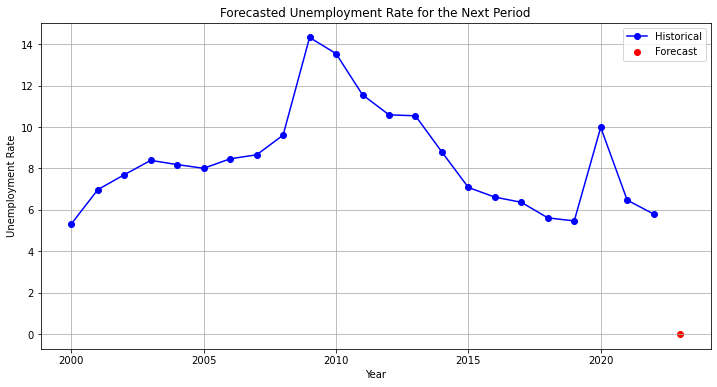

In [22]:


# Prepare the features for the next time period
X_next_period = ltsm[features].iloc[-1].values.reshape(1, -1)

# Reshape the features for scaling
X_next_period_reshaped = X_next_period.reshape(-1, 1)

# Scale the features for the next time period
X_next_period_scaled = scaler.transform(X_next_period_reshaped)

# Reshape the scaled features for LSTM input
X_next_period_scaled_reshaped = X_next_period_scaled.reshape(1, 1, len(features))

# Use the trained LSTM model to predict the unemployment rate for the next time period
predicted_unemployment_rate = model.predict(X_next_period_scaled_reshaped)

# Inverse transform the predicted unemployment rate to get the actual value
predicted_unemployment_rate_actual = scaler.inverse_transform(predicted_unemployment_rate)

# Plotting the forecasted unemployment rate along with historical data
historical_dates = ltsm['Years'].values
historical_unemployment_rates = ltsm[target].values
next_period_date = historical_dates[-1] + 1  # Assuming the next period is one year ahead

plt.figure(figsize=(12, 6))
plt.plot(historical_dates, historical_unemployment_rates, label='Historical', color='blue', marker='o')
plt.scatter(next_period_date, predicted_unemployment_rate_actual, label='Forecast', color='red', marker='o')
plt.title('Forecasted Unemployment Rate for the Next Period')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)
plt.show()


**Predictions for next Years**

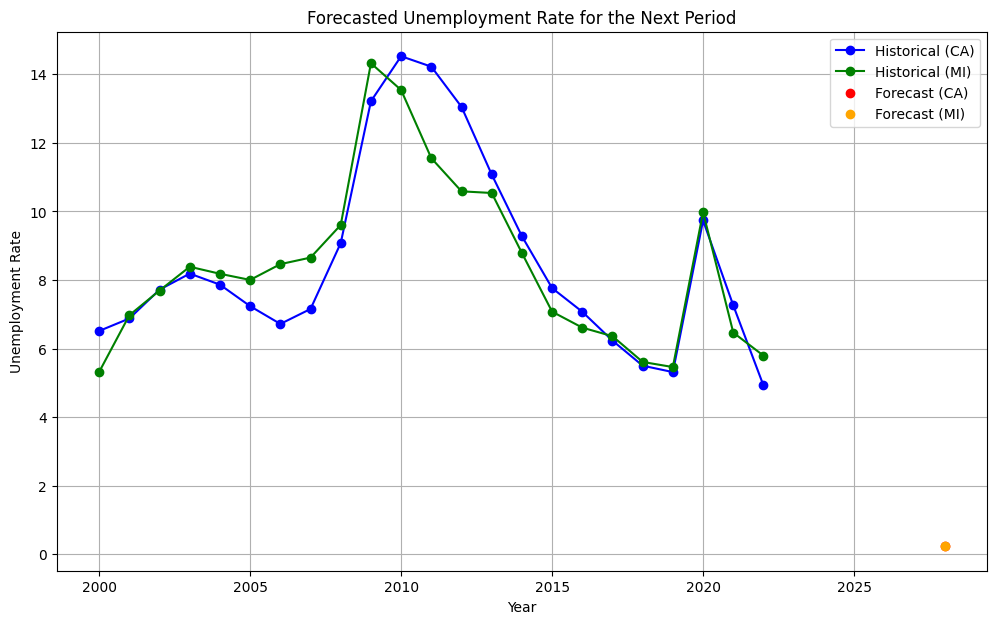

In [56]:
start_year = 2000
end_year = 2028

# ltsm is your DataFrame containing the data
historical_dates_ca = np.arange(start_year, end_year)
historical_unemployment_rates_ca = ltsm['CA_Unemployment_rate_0'].values

# Extend the historical data to match the specified range of years
extended_historical_unemployment_rates_ca = np.concatenate([historical_unemployment_rates_ca, np.full(end_year - start_year - len(historical_unemployment_rates_ca), np.nan)])

historical_dates_mi = np.arange(start_year, end_year)
historical_unemployment_rates_mi = ltsm['MI_Unemployment_rate_0'].values

# Extend the historical data to match the specified range of years
extended_historical_unemployment_rates_mi = np.concatenate([historical_unemployment_rates_mi, np.full(end_year - start_year - len(historical_unemployment_rates_mi), np.nan)])

next_period_date_ca = end_year
next_period_date_mi = end_year

plt.figure(figsize=(12, 7))
plt.plot(historical_dates_ca, extended_historical_unemployment_rates_ca, label='Historical (CA)', color='blue', marker='o')
plt.plot(historical_dates_mi, extended_historical_unemployment_rates_mi, label='Historical (MI)', color='green', marker='o')

plt.scatter(next_period_date_ca, predicted_unemployment_rate_ca_actual, label='Forecast (CA)', color='red', marker='o')
plt.scatter(next_period_date_mi, predicted_unemployment_rate_mi_actual, label='Forecast (MI)', color='orange', marker='o')

plt.title('Forecasted Unemployment Rate for the Next Period')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)
plt.show()
